# Whatsapp chat analysis

WhatsApp chat analysis provided insights into the chat data, including word frequencies, message patterns over time, and participation trends. These visualizations offer a comprehensive overview of the chat dynamics and can assist in extracting meaningful information from the chat log.

The data i used on this project is my personal chat history with my friend. Whatsapp allows their users to export the data of their conversation with a particular chat or group. 

In [99]:
!pip install calmap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [100]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Mounting google drive

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing necessary libraries

In [102]:
import re
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from collections import Counter
import emoji
import collections
import calmap
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Read the data

In [103]:
f = open("/content/drive/MyDrive/Colab Notebooks/Self practice projects/Whatsapp/WhatsApp Chat with Samip.txt","r",encoding="utf-8")
data = f.read()
# print(data)

In [104]:
pattern = '\d{1,2}/\d{1,2}/\d{1,2},\s\d{1,2}:\d{1,2}\s(?:am|pm)\s-\s'

In [105]:
messages = re.split(pattern,data)[1:]
# messages

In [106]:
dates = re.findall(pattern,data)
# dates

## Data formatting

In [107]:
from datetime import datetime
df = pd.DataFrame({'user_message':messages,"message_date":dates}) 
def convert24(time):
    time=time.split(",")
    # Parse the time string into a datetime object
    t = datetime.strptime(time[1].strip(" -"), '%I:%M %p')
    # Format the datetime object into a 24-hour time string
    ta= time[0]+","+t.strftime('%H:%M')
    return ta
# convert into 24hr format
df['message_date'] = df['message_date'].apply(lambda x: convert24(x))
df["message_date"] = pd.to_datetime(df["message_date"],format="%d/%m/%y,%H:%M")
df.tail()

,user_message,message_date
12199,Samip: haan abhi naah ke nikla ghar par tha\n,2023-06-04 15:11:00
12200,💤💤 HSƎ⅄Ɐſ: Kahi ja raha hai ya Ghar pe hi hai\n,2023-06-04 15:18:00
12201,Samip: naa ghar par he h a hi toh kaha jawe ga...,2023-06-04 15:18:00
12202,💤💤 HSƎ⅄Ɐſ: Thikh hai aaya ms\n,2023-06-04 15:19:00
12203,💤💤 HSƎ⅄Ɐſ: Me\n,2023-06-04 15:19:00


In [108]:
df.shape

(12204, 2)

In [109]:
users=[]
messages=[]
for message in df["user_message"]:
    entry = re.split("([\w+\W]+?):\s",message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append("group_notification")
        messages.append(entry[0])
df['user']=users
df['message']=messages
df.drop(columns=['user_message'],inplace=True)

In [110]:
df.head()

,message_date,user,message
0,2018-06-14 14:10:00,💤💤 HSƎ⅄Ɐſ,
1,2018-09-07 20:14:00,Samip,Chalo khelte hai\n
2,2018-09-07 20:14:00,💤💤 HSƎ⅄Ɐſ,Ha\n
3,2018-09-07 20:15:00,Samip,Msg karna khele tab\n
4,2018-09-07 20:15:00,💤💤 HSƎ⅄Ɐſ,Ha abhi me 1 st aaya raat ko karta hu msg\n


## Preparing extra columns

In [111]:
# df['year']=df['message_date'].dt.year
# df['month']=df['message_date'].dt.month_name()
# df['day']=df['message_date'].dt.day

df['day'] = df['message_date'].dt.strftime('%a')
df['month'] = df['message_date'].dt.strftime('%b')
df['year'] = df['message_date'].dt.year
df['date'] = df['message_date'].apply(lambda x: x.date())
# df['hour']=df['message_date'].dt.hour
# df['minute']=df['message_date'].dt.minute

In [112]:
df

,message_date,user,message,day,month,year,date
0,2018-06-14 14:10:00,💤💤 HSƎ⅄Ɐſ,,Thu,Jun,2018,2018-06-14
1,2018-09-07 20:14:00,Samip,Chalo khelte hai\n,Fri,Sep,2018,2018-09-07
2,2018-09-07 20:14:00,💤💤 HSƎ⅄Ɐſ,Ha\n,Fri,Sep,2018,2018-09-07
3,2018-09-07 20:15:00,Samip,Msg karna khele tab\n,Fri,Sep,2018,2018-09-07
4,2018-09-07 20:15:00,💤💤 HSƎ⅄Ɐſ,Ha abhi me 1 st aaya raat ko karta hu msg\n,Fri,Sep,2018,2018-09-07
...,...,...,...,...,...,...,...
12199,2023-06-04 15:11:00,Samip,haan abhi naah ke nikla ghar par tha\n,Sun,Jun,2023,2023-06-04
12200,2023-06-04 15:18:00,💤💤 HSƎ⅄Ɐſ,Kahi ja raha hai ya Ghar pe hi hai\n,Sun,Jun,2023,2023-06-04
12201,2023-06-04 15:18:00,Samip,naa ghar par he h a hi toh kaha jawe garmi me\n,Sun,Jun,2023,2023-06-04
12202,2023-06-04 15:19:00,💤💤 HSƎ⅄Ɐſ,Thikh hai aaya ms\n,Sun,Jun,2023,2023-06-04


## Messages sent by each user

In [113]:
messages_by_user = df['user'].value_counts()
messages_by_user

💤💤 HSƎ⅄Ɐſ    6292
Samip        5912
Name: user, dtype: int64

## Messages sent by each user in %

In [114]:
percent_messages_by_user = 100*(messages_by_user)/df.shape[0]
p = round(percent_messages_by_user, 2)
p_D = pd.DataFrame({'email':p.index, 'list':p.values})
p_D

,email,list
0,💤💤 HSƎ⅄Ɐſ,51.56
1,Samip,48.44


## Messages sent per day over a time period

In [115]:
df1 = df.copy()
df1['message_count'] = [1] * df1.shape[0]
df1.drop(columns='year', inplace=True)
df1 = df1.groupby('date').sum().reset_index()
df1

,date,message_count
0,2018-06-14,1
1,2018-09-07,13
2,2019-01-19,1
3,2019-01-25,2
4,2019-02-17,1
...,...,...
427,2023-05-29,20
428,2023-05-30,200
429,2023-06-01,14
430,2023-06-02,8


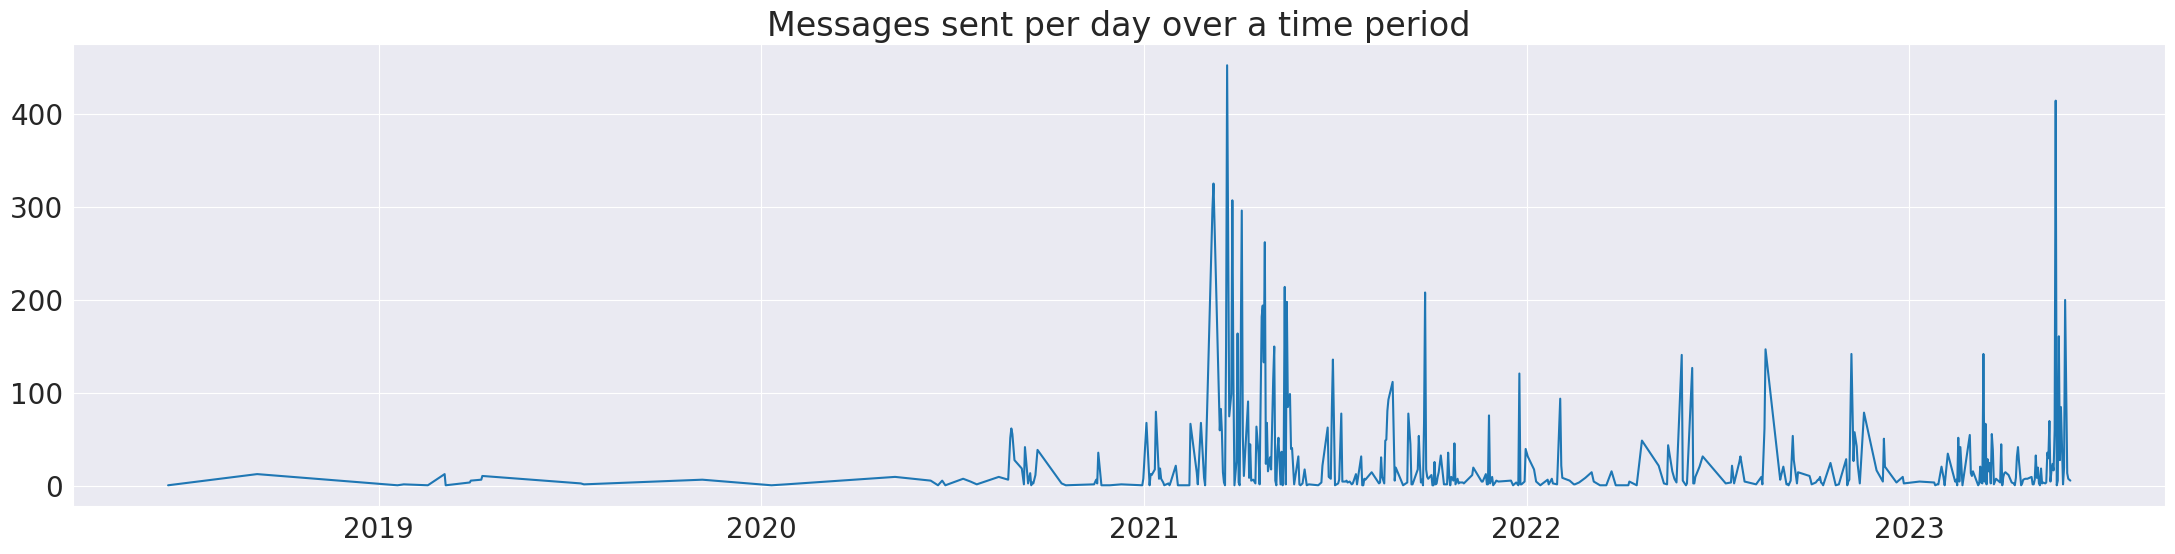

In [116]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (27, 6)   

plt.plot(df1.date, df1.message_count)
plt.title('Messages sent per day over a time period');

## Top 10 days where maximum number of texts sent

In [117]:
top10days = df1.sort_values(by="message_count", ascending=False).head(10)
top10days.reset_index(inplace=True)
top10days.drop(columns="index", inplace=True)
top10days

,date,message_count
0,2021-03-21,452
1,2023-05-21,414
2,2021-03-08,325
3,2021-03-26,307
4,2021-03-07,298
5,2021-04-04,296
6,2021-04-26,262
7,2021-05-15,214
8,2021-09-26,208
9,2023-05-30,200


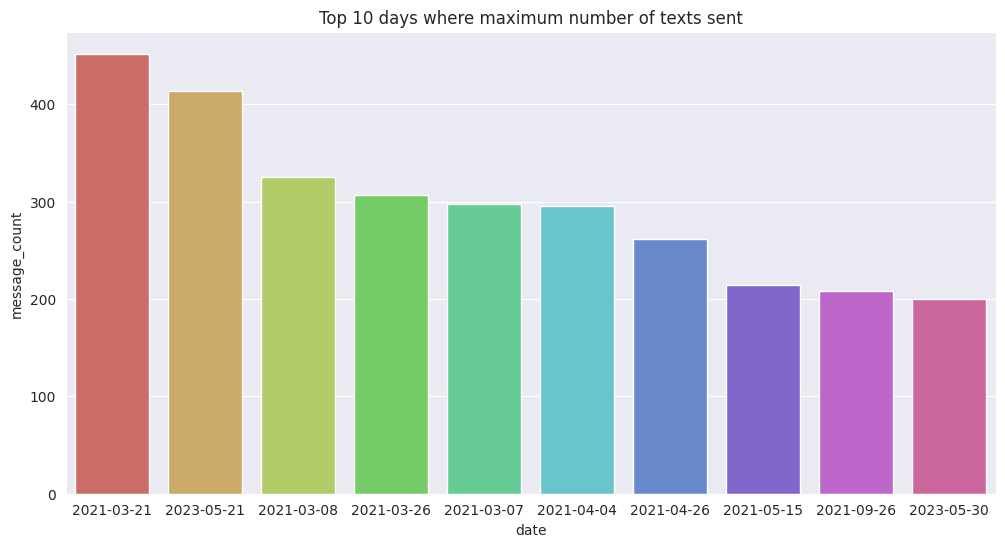

In [118]:
sns.set_style("darkgrid")

matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x=top10days.date, y=top10days.message_count, palette="hls")
plt.title('Top 10 days where maximum number of texts sent');

## Mostly used emoji count

In [119]:
line_list = df['message']
new_line_list = []

for word in line_list:
  emojis = emoji.distinct_emoji_list(word)
  new_line_list.extend([emoji.demojize(is_emoji) for is_emoji in emojis])

In [120]:
# new_line_list

In [121]:
new_line_counter = collections.Counter(new_line_list)

top10emojis = pd.DataFrame()
top10emojis['emoji'] = [''] * 10
top10emojis['emoji_count'] = [0] * 10
top10emojis['emoji_description'] = [''] * 10

i = 0
for item in new_line_counter.most_common(10):
    emoji_char = item[0]
    description = emoji.demojize(emoji_char)[1:-1]
    
    # Convert emoji name to actual emoji character
    emoji_character = emoji.emojize(emoji_char)
    
    top10emojis.loc[i, 'emoji'] = emoji_character
    top10emojis.loc[i, 'emoji_count'] = int(item[1])
    top10emojis.loc[i, 'emoji_description'] = description
    i += 1

top10emojis

,emoji,emoji_count,emoji_description
0,😂,779,face_with_tears_of_joy
1,🤣,224,rolling_on_the_floor_laughing
2,🥲,215,smiling_face_with_tear
3,😌,58,relieved_face
4,🙂,56,slightly_smiling_face
5,🥱,28,yawning_face
6,😅,26,grinning_face_with_sweat
7,🥺,24,pleading_face
8,🤩,23,star-struck
9,🫡,22,saluting_face


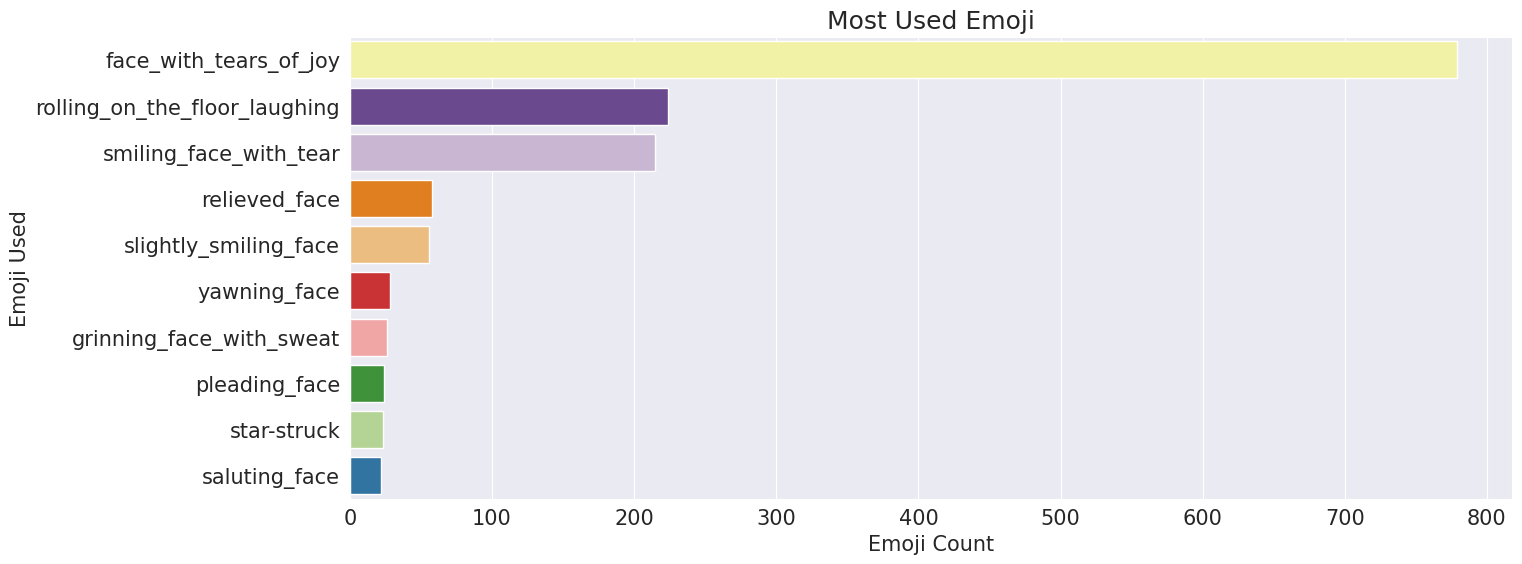

In [122]:
plt.figure(figsize=(15, 6))
matplotlib.rcParams['font.size'] = 15
sns.set_style("darkgrid")
sns.barplot(x='emoji_count', y='emoji_description', data=top10emojis, palette='Paired_r')

plt.title('Most Used Emoji')
plt.xlabel('Emoji Count')
plt.ylabel('Emoji Used')
plt.show()

## Most active hours

In [123]:
df3 = df.copy()
df3['message_count'] = [1] * df.shape[0]

df3['hour'] = df3['message_date'].apply(lambda x: x.hour)

grouped_by_time = df3.groupby('hour').sum().reset_index().sort_values(by = 'hour')

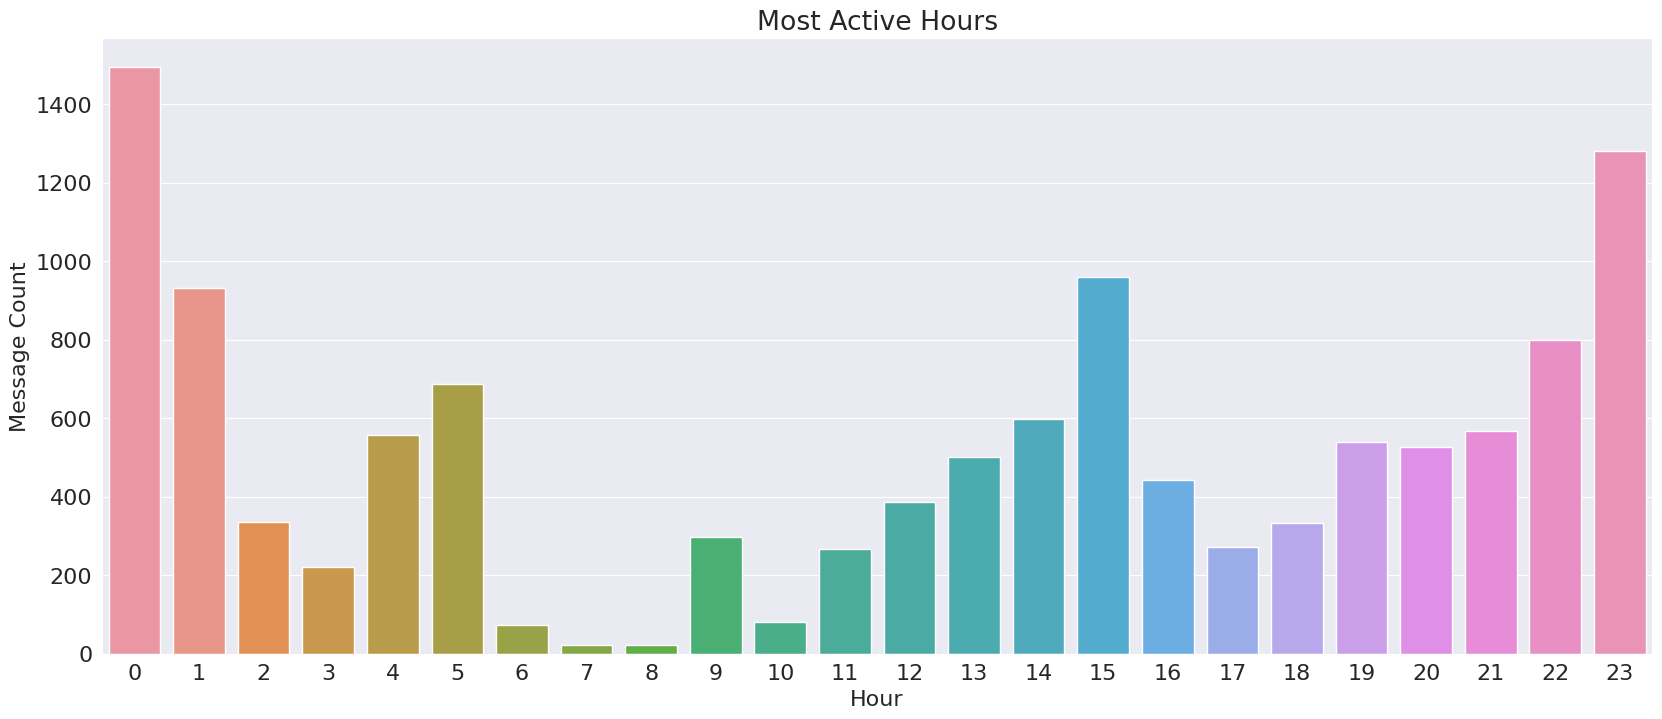

In [124]:
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (20, 8)
sns.set_style("darkgrid")

sns.barplot(x=grouped_by_time.hour, y=grouped_by_time.message_count)
plt.title('Most Active Hours')
plt.xlabel('Hour')
plt.ylabel('Message Count')
plt.show()


## Total messages sent by week and months

In [125]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# grouping by day;
grouped_by_day = df3.groupby('day').sum().reset_index()[['day', 'message_count']]

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec'] 
# grouping by month;
grouped_by_month = df3.groupby('month').sum().reset_index()[['month', 'message_count']]

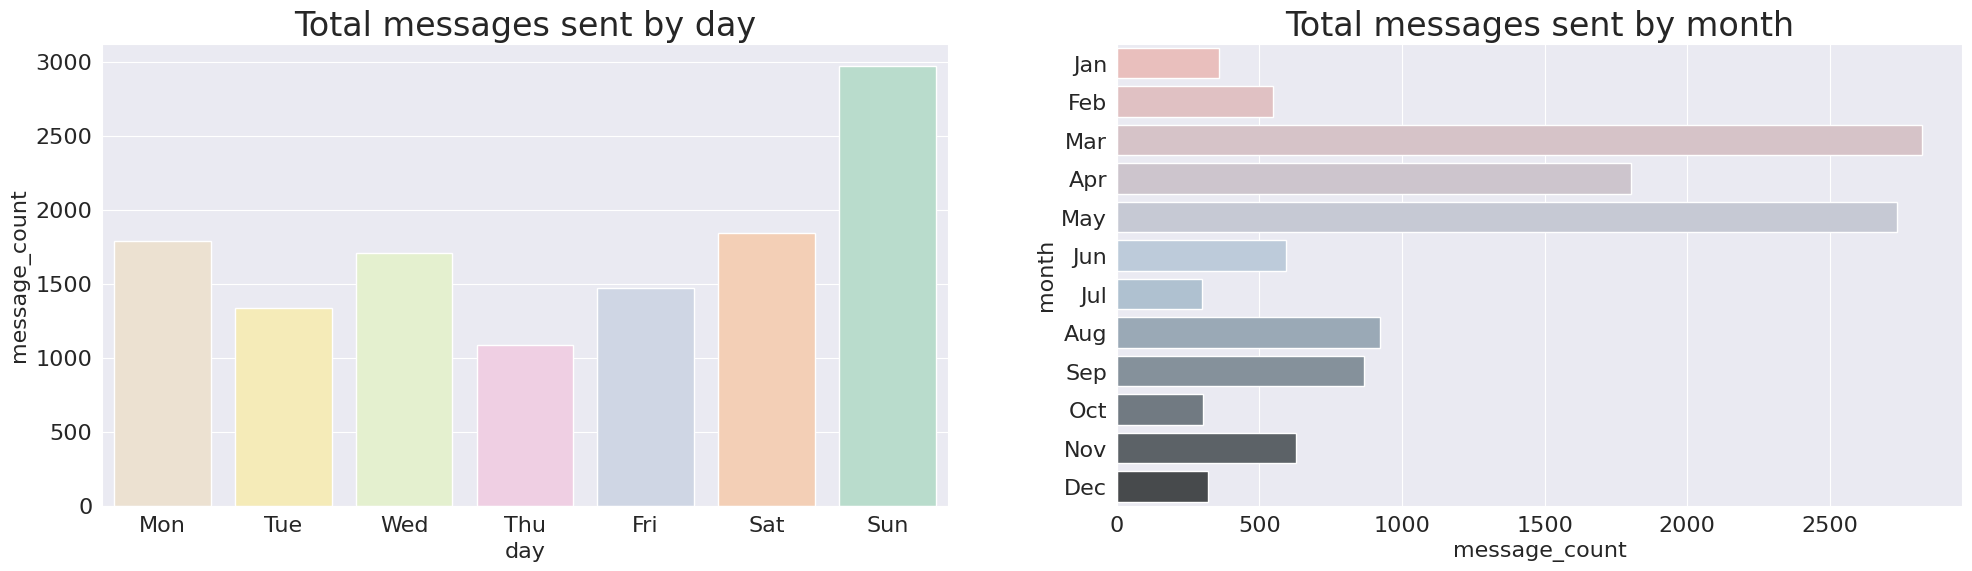

In [126]:
fig, axs = plt.subplots(1, 2, figsize = (24, 6))
matplotlib.rcParams['font.size'] = 20
sns.set_style("darkgrid")

# PLOT 1: Messages by weekday
sns.barplot(x=grouped_by_day.day, y=grouped_by_day.message_count, order=days, ax = axs[0], palette='Pastel2_r')
axs[0].set_title('Total messages sent by day')

# PLOT 2: Messages by months
sns.barplot(y = grouped_by_month.month, x=grouped_by_month.message_count, order = months, ax = axs[1], palette='Pastel1_d')
axs[1].set_title('Total messages sent by month');


## Most used words

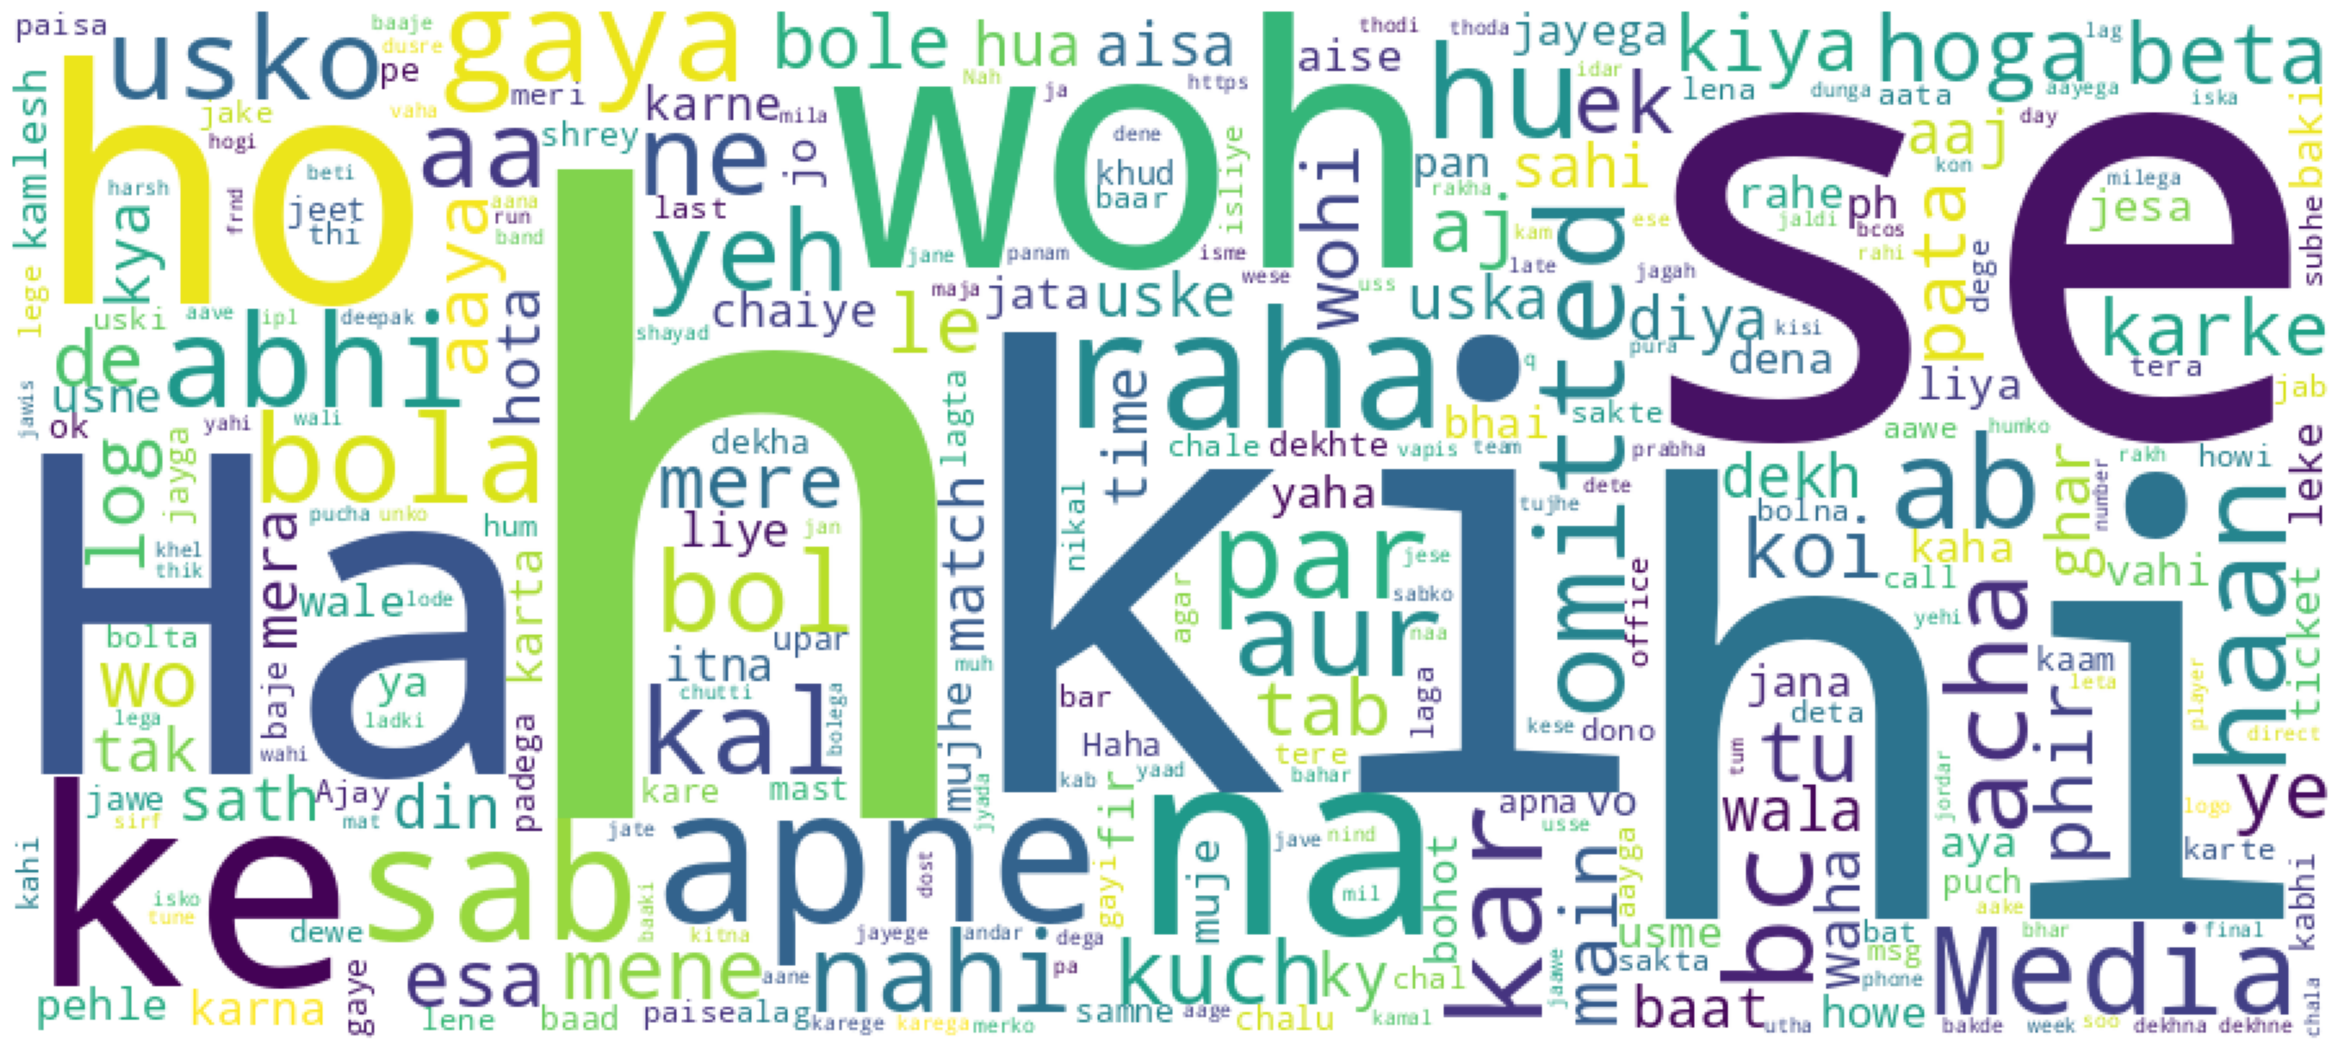

In [127]:
stop_words = set(stopwords.words('english'))
stop_words.update(['thikh','hai','ha','isiliye','haha','toh','bhi','ko','ka','ka','nai','tha','Ki'])
df['title_no_stopwords'] = df['message'].apply(lambda x:[item for item in str(x).split() 
                                                                                        if item not in stop_words]).copy()

all_words = list([a for b in df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(30,20))
    plt.imshow(wordcloud)
    plt.axis("off");

wordcloud = WordCloud(width=900, height=400, 
                      background_color='white',
                      random_state=10,
                      max_words=300,
                      contour_width=3, 
                      collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

## Calender Map

TypeError: ignored

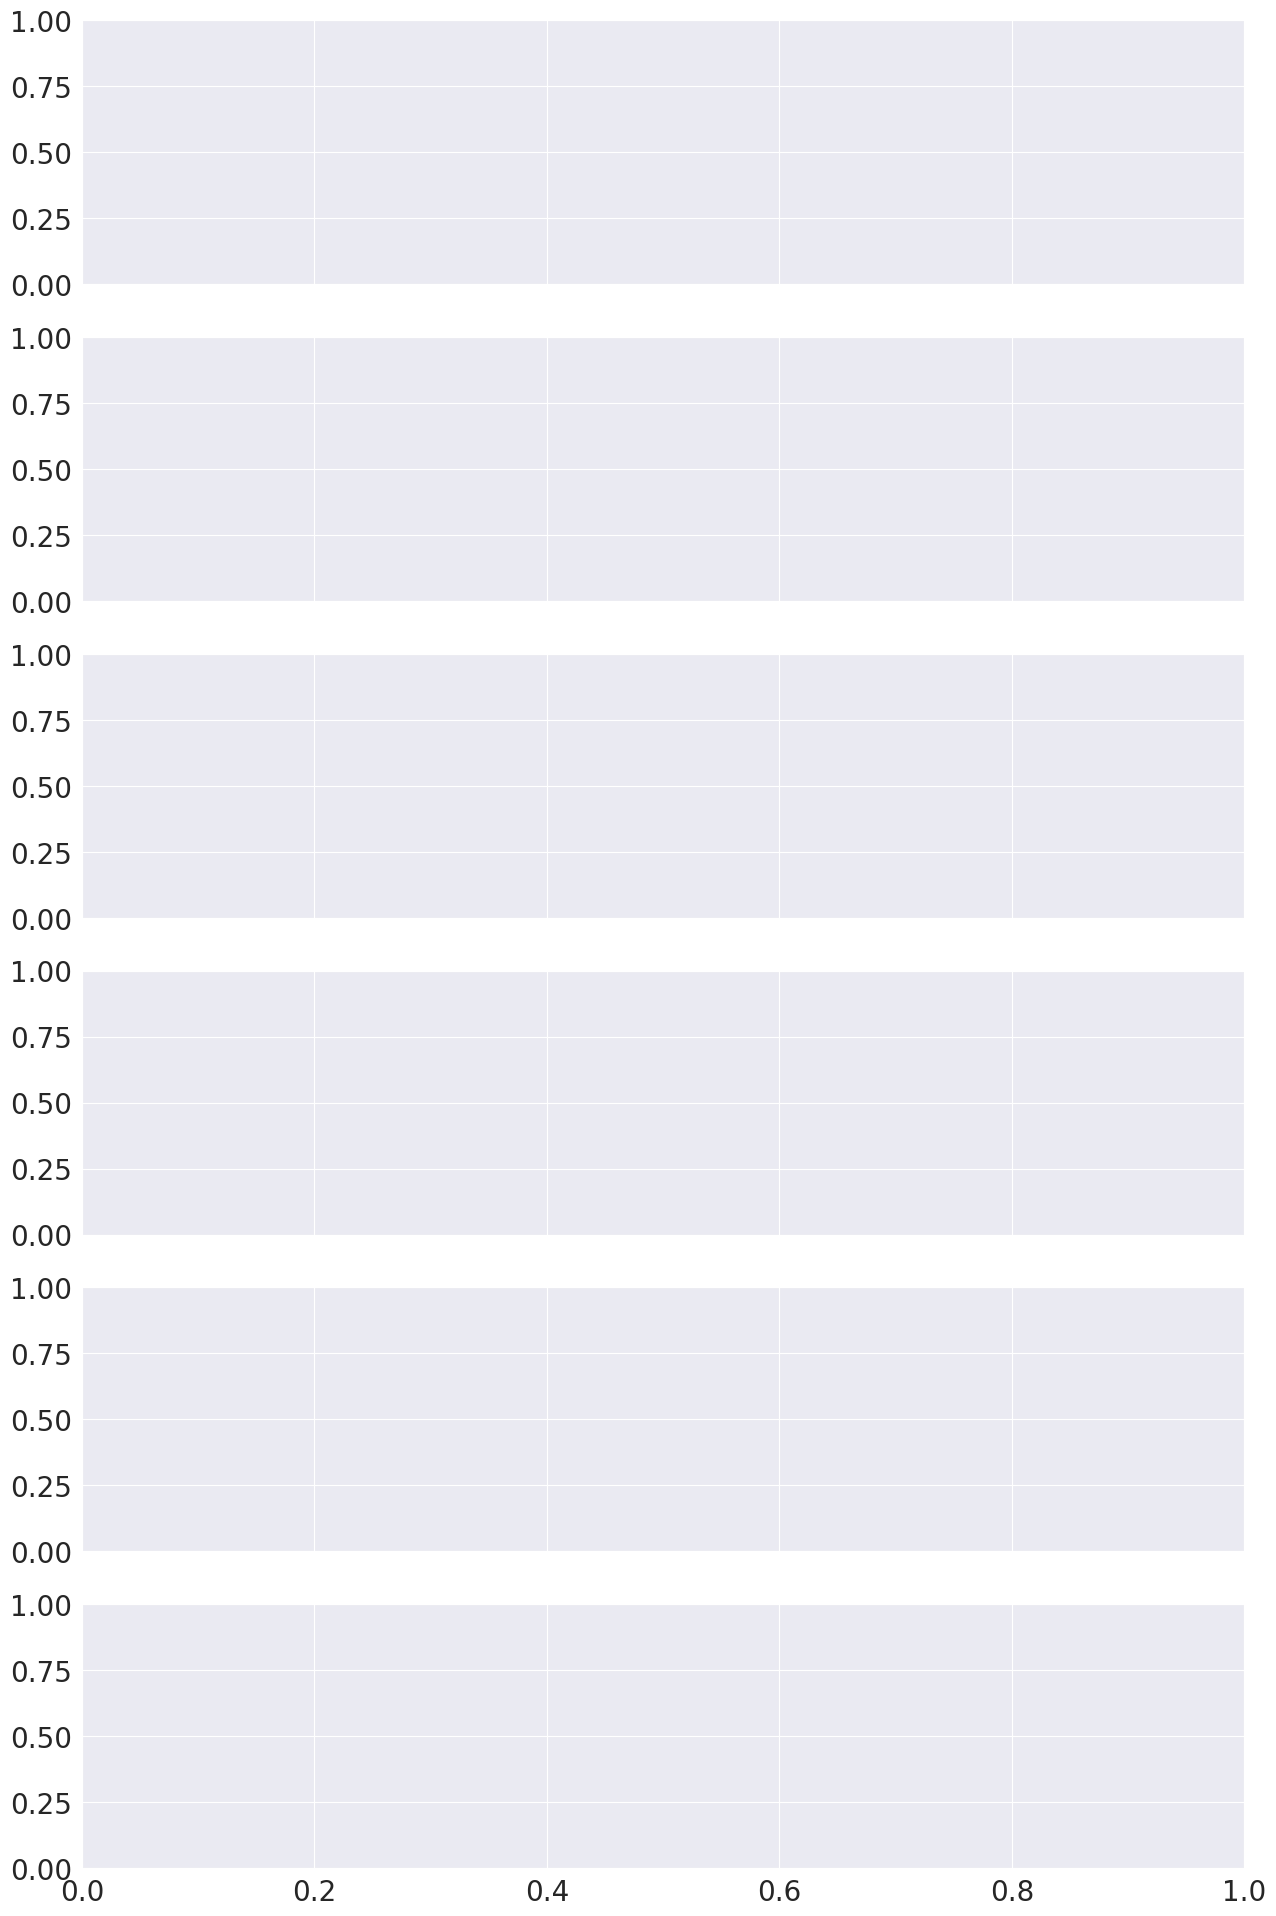

In [128]:
# Get the unique years from the 'year' column
years = df['year'].unique()

# Create a subplot for each year
fig, axes = plt.subplots(len(years), 1, figsize=(15, 4*len(years)), sharex=True)

# Iterate over the years and create year plots
for i, year in enumerate(years):
    ax = axes[i]
    cax = calmap.yearplot(df['year'], year=year, ax=ax)
    
    ax.set_xlabel("Chats grouped by day", fontsize=12)
    ax.set_ylabel(year, fontsize=58, color='#f5f5f5', weight='bold')
    ax.set_title(f'Number of chats per day heatmap - {year}', fontsize=16)
    
    divider = make_axes_locatable(cax)
    lcax = divider.append_axes("right", size="2%", pad=0.5)
    fig.colorbar(cax.get_children()[1], cax=lcax)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.1)

# Display the plot
plt.show()